In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql import SparkSession

#create session
spark = SparkSession.builder.appName('IPL_Data_Analytics').getOrCreate()

In [0]:
from pyspark.sql.types import StructField, StructType, DateType, IntegerType, StringType, BooleanType, DecimalType
from pyspark.sql.functions import col, when, sum, avg, row_number
from pyspark.sql.window import Window

In [0]:
ball_by_ball_schema = StructType([
    StructField('match_id',IntegerType(), True),
    StructField('over_id', IntegerType(), True),
    StructField('ball_id', IntegerType(), True),
    StructField('innings_no', IntegerType(), True),
    StructField('team_batting', StringType(), True),
    StructField('team_bowling', StringType(), True),
    StructField('striker_batting_position', IntegerType(), True),
    StructField('extra_type', StringType(), True),
    StructField('runs_scored', IntegerType(), True),
    StructField('extra_runs', IntegerType(), True),
    StructField('wides', IntegerType(), True),
    StructField('legbyes', IntegerType(), True),
    StructField('byes', IntegerType(), True),
    StructField('noballs', IntegerType(), True),
    StructField('penalty', IntegerType(), True),
    StructField('bowler_extras', IntegerType(), True),
    StructField('out_type', StringType(), True),
    StructField('caught', BooleanType(), True),
    StructField('bowled', BooleanType(), True),
    StructField('run_out', BooleanType(), True),
    StructField('lbw', BooleanType(), True),
    StructField('retired_hurt', BooleanType(), True),
    StructField('stumped', BooleanType(), True),
    StructField('caught_and_bowled', BooleanType(), True),
    StructField('hit_wicket', BooleanType(), True),
    StructField('obstructingfeild', BooleanType(), True),
    StructField('bowler_wicket', BooleanType(), True),
    StructField('match_date', DateType(), True),
    StructField('season', IntegerType(), True),
    StructField('striker', IntegerType(), True),
    StructField('non_striker', IntegerType(), True),
    StructField('bowler', IntegerType(), True),
    StructField('player_out', IntegerType(), True),
    StructField('fielders', IntegerType(), True),
    StructField('striker_match_sk', IntegerType(), True),
    StructField('strikersk', IntegerType(), True),
    StructField('nonstriker_match_sk', IntegerType(), True),
    StructField('nonstriker_sk', IntegerType(), True),
    StructField('fielder_match_sk', IntegerType(), True),
    StructField('fielder_sk', IntegerType(), True),
    StructField('bowler_match_sk', IntegerType(), True),
    StructField('bowler_sk', IntegerType(), True),
    StructField('playerout_match_sk', IntegerType(), True),
    StructField('battingteam_sk', IntegerType(), True),
    StructField('bowlingteam_sk', IntegerType(), True),
    StructField('keeper_catch', BooleanType(), True),
    StructField('player_out_sk', IntegerType(), True),
    StructField('matchdatesk', DateType(), True)
    ])

In [0]:
ball_by_ball = spark.read.schema(ball_by_ball_schema).format('csv').option('header','true').load('s3://databricks-spark-ipl-shiro-project/Ball_By_Ball.csv')

In [0]:
ball_by_ball.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

In [0]:
match = spark.read.schema(match_schema).format('csv').option('header','true').load('s3://databricks-spark-ipl-shiro-project/Match.csv')

In [0]:
player = spark.read.schema(player_schema).format('csv').option('header','true').load('s3://databricks-spark-ipl-shiro-project/Player.csv')

In [0]:
Player_match = spark.read.schema(player_match_schema).format('csv').option('header','true').load('s3://databricks-spark-ipl-shiro-project/Player_match.csv')

In [0]:
team = spark.read.schema(team_schema).format('csv').option('header','true').load('s3://databricks-spark-ipl-shiro-project/Team.csv')

In [0]:
team.show(2)

+-------+-------+--------------------+
|team_sk|team_id|           team_name|
+-------+-------+--------------------+
|      0|      1|Kolkata Knight Ri...|
|      1|      2|Royal Challengers...|
+-------+-------+--------------------+
only showing top 2 rows



In [0]:
Player_match.show(2)

+---------------+---------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|     bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|
+---------------+---------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|             -1|             -

In [0]:
player.show(2)

+---------+---------+-----------+----+--------------+----------------+------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|
+---------+---------+-----------+----+--------------+----------------+------------+
|        0|        1| SC Ganguly|null| Left-hand bat|Right-arm medium|       India|
|        1|        2|BB McCullum|null|Right-hand bat|Right-arm medium| New Zealand|
+---------+---------+-----------+----+--------------+----------------+------------+
only showing top 2 rows



In [0]:
match.show(2)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    runs|      Result|BB McCullum|       140|         1|
|       1|  335988|     Kings XI Punjab| Chennai

In [0]:
#Filter to only include valid deliveries (no no balls or wide balls)
ball_by_ball_valid = ball_by_ball.filter((col('wides')==0) & (col('noballs') == 0))

In [0]:
#Avg runs and total runs scored in each match and innings
total_and_avg_runs = ball_by_ball_valid.groupBy('match_id','innings_no').agg(
    sum('runs_scored').alias('total_runs'),
    avg('runs_scored').alias('avg_runs')
)

In [0]:
#Window Function : Calculate total of runs in each match
WindowSpec = Window.partitionBy('match_id','innings_no').orderBy('over_id')

ball_by_ball_valid = ball_by_ball_valid.withColumn(
    'running_total_runs',
    sum('runs_scored').over(WindowSpec)
)

In [0]:
#Conditional Column: Flag for high impact balls (either a wicket or 6 runs scored)
ball_by_ball_valid = ball_by_ball_valid.withColumn(
    'high_impact',
    when((col('runs_scored') + col('extra_runs') > 6) | (col('bowler_wicket') == True), True).otherwise(False)
)

In [0]:
ball_by_ball_valid.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when

In [0]:
#Extracting year,month,day from match date

match_df = match.withColumn('year', year('match_date'))
match_df = match.withColumn('month', month('match_date'))
match_df = match.withColumn('day', dayofmonth('match_date'))


In [0]:
#High Margin wins : Classifying wins as low, medium and high
match_df = match_df.withColumn(
    'win_margin_category',
    when(col('win_margin') >= 100, 'High')
    .when((col('win_margin') >= 50) & (col('win_margin') < 100), 'Medium')
    .otherwise('Low')
)

In [0]:
# Analyzing impact of toss
match_df = match_df.withColumn(
    'toss_match_win',
    when(col('toss_winner') == col('match_winner'), 'Yes').otherwise('No')
)

In [0]:
match_df.show(5)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-------------------+--------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id| day|win_margin_category|toss_match_win|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-------------------+--------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight R

In [0]:
#Probability of winning the match if toss is won
count_yes = match_df.filter(col("toss_match_win") == "Yes").count()
count_no = match_df.filter(col("toss_match_win") == "No").count()

total_count = match_df.count()
percent_yes = (count_yes / total_count) * 100
percent_no = (count_no / total_count) * 100

print(f"Percentage of Yes: {round(percent_yes, 2)}%")
print(f"Percentage of No: {round(percent_no, 2)}%")

Percentage of Yes: 50.86%
Percentage of No: 49.14%


In [0]:
from pyspark.sql.functions import lower, regexp_replace

#Normalize and clean player names
player = player.withColumn('player_name', lower(regexp_replace('player_name', '[^a-zA-Z0-9 ]', "")))

In [0]:
#Handle missing values in batting hand and bowling hand with default value

player = player.na.fill({'batting_hand': 'unknown', 'bowling_skill': 'unknown'})

In [0]:
# Categorizing players based on batting hand

player = player.withColumn(
    'batting_style',
    when(col('batting_hand').contains('left'), 'left-handed').otherwise('right-handed')
)

In [0]:
player.show(5)

+---------+---------+---------------+----+--------------+------------------+------------+-------------+
|player_sk|player_id|    player_name| dob|  batting_hand|     bowling_skill|country_name|batting_style|
+---------+---------+---------------+----+--------------+------------------+------------+-------------+
|        0|        1|     sc ganguly|null| Left-hand bat|  Right-arm medium|       India| right-handed|
|        1|        2|    bb mccullum|null|Right-hand bat|  Right-arm medium| New Zealand| right-handed|
|        2|        3|     rt ponting|null|Right-hand bat|  Right-arm medium|   Australia| right-handed|
|        3|        4|      dj hussey|null|Right-hand bat|Right-arm offbreak|   Australia| right-handed|
|        4|        5|mohammad hafeez|null|Right-hand bat|Right-arm offbreak|    Pakistan| right-handed|
+---------+---------+---------------+----+--------------+------------------+------------+-------------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import col, when, current_date, expr

In [0]:
#Veteran status of a player
Player_match = Player_match.withColumn(
    'veteran_status',
    when(col('age_as_on_match') >= 35, 'veteran').otherwise('Non-veteran')
)

In [0]:
#Filter to include players who did not bat

#Player_match = Player_match.filter(col('batting_status') != 'Did Not Bat')

In [0]:
#Dynamic column to calculate years since debut

Player_match = Player_match.withColumn(
    'years_since_debut',
    (year(current_date()) - col('season_year'))
)


In [0]:
Player_match.show(5)

+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+-----

In [0]:
ball_by_ball_valid.createOrReplaceTempView('ball_by_ball_v')
player.createOrReplaceTempView('player_v')
Player_match.createOrReplaceTempView('Player_match_v')
team.createOrReplaceTempView('Team_v')
match.createOrReplaceTempView('match_v')

SQL Queries

In [0]:
#SQL Query to display top scoring batsmen from ipl season 2015
top_scoring_bastman_per_season = spark.sql("""
SELECT p.player_name, m.season_year,
SUM(b.runs_scored) as Total_runs
From ball_by_ball_v b 
join match_v m ON b.match_id = m.match_id 
join Player_match_v pm on m.match_id = pm.match_id and b.striker = pm.player_id
join player_v p on p.player_id = pm.player_id
Group by p.player_name, m.season_year
having season_year = '2015'
order by m.season_year, total_runs DESC
""")

In [0]:
top_scoring_bastman_per_season.show(5)

+--------------+-----------+----------+
|   player_name|season_year|Total_runs|
+--------------+-----------+----------+
|     da warner|       2015|       554|
|   lmp simmons|       2015|       540|
|     am rahane|       2015|       540|
|ab de villiers|       2015|       511|
|       v kohli|       2015|       505|
+--------------+-----------+----------+
only showing top 5 rows



In [0]:
#SQL query to show most economical bowlers in the powerplay
economical_bowlers_powerplay = spark.sql("""
SELECT p.player_name, avg(b.runs_scored) as avg_runs_per_ball, count(b.bowler_wicket) as total_wickets
from ball_by_ball_v b
join Player_match_v pm on b.match_id = pm.match_id and b.bowler = pm.player_id
join player_v p on pm.player_id = p.player_id
where b.over_id <= 6
Group by p.player_name
having count(*) > 120
order by avg_runs_per_ball, total_wickets DESC
""")

In [0]:
economical_bowlers_powerplay.show(5)

+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|smsm senanayake|0.8492063492063492|            0|
|      sp narine| 0.929718875502008|            0|
|     gd mcgrath|0.9324324324324325|            0|
|     sl malinga|0.9407630522088354|            0|
|  sohail tanvir| 0.946969696969697|            0|
+---------------+------------------+-------------+
only showing top 5 rows



In [0]:
#SQL query to show if winning toss resulted in a win
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner,
       CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match_v m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")

In [0]:
toss_impact_individual_matches.show(5)

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
+--------+--------------------+---------+--------------------+-------------+
only showing top 5 rows



In [0]:
import matplotlib.pyplot as plt

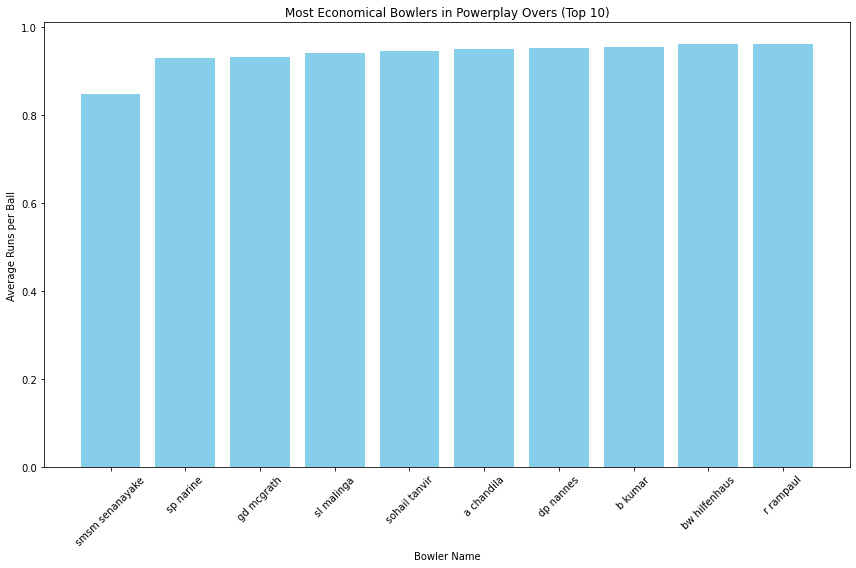

In [0]:

# Assuming 'economical_bowlers_powerplay' is already executed and available as a Spark DataFrame
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))
# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
import seaborn as sns

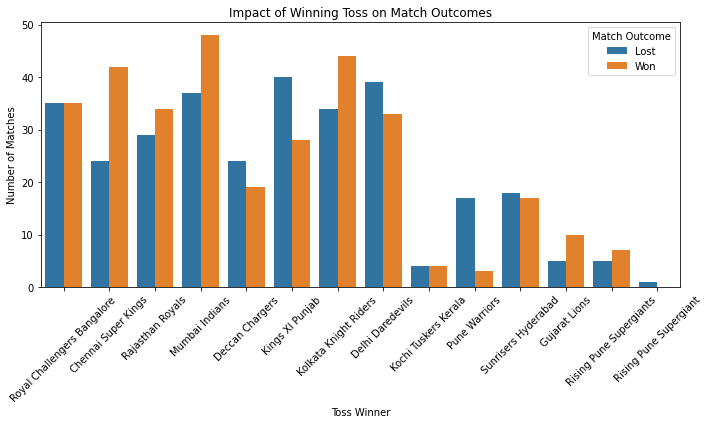

In [0]:

toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
dismissal_types = spark.sql("""
SELECT out_type, COUNT(*) AS frequency
FROM ball_by_ball_v
WHERE out_type IS NOT NULL
GROUP BY out_type
ORDER BY frequency DESC
""")

In [0]:
dismissal_types.show()

+--------------------+---------+
|            out_type|frequency|
+--------------------+---------+
|      Not Applicable|   137852|
|              caught|     3678|
|              bowled|     1382|
|             run out|      744|
|        Keeper Catch|      695|
|                 lbw|      455|
|             stumped|      222|
|   caught and bowled|      211|
|          hit wicket|        9|
|        retired hurt|        9|
|obstructing the f...|        1|
+--------------------+---------+



In [0]:
import pandas as pd

In [0]:
dismissal_types_NA = spark.createDataFrame(dismissal_types.tail(dismissal_types.count()-1), dismissal_types.schema)

In [0]:
dismissal_types_NA.show()

+--------------------+---------+
|            out_type|frequency|
+--------------------+---------+
|              caught|     3678|
|              bowled|     1382|
|             run out|      744|
|        Keeper Catch|      695|
|                 lbw|      455|
|             stumped|      222|
|   caught and bowled|      211|
|          hit wicket|        9|
|        retired hurt|        9|
|obstructing the f...|        1|
+--------------------+---------+



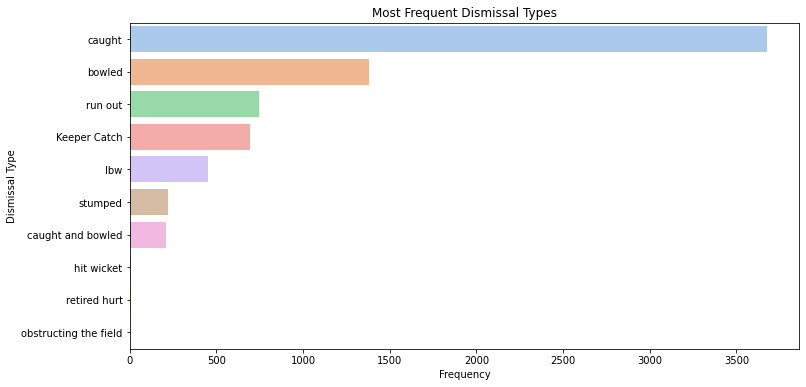

In [0]:
# Convert to Pandas DataFrame
dismissal_types_pd = dismissal_types_NA.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()

In [0]:
#SQL Query to calculate scores on each venue
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball_v.match_id, match_v.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball_v
    JOIN match_v ON ball_by_ball_v.match_id = match_v.match_id
    GROUP BY ball_by_ball_v.match_id, match_v.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")

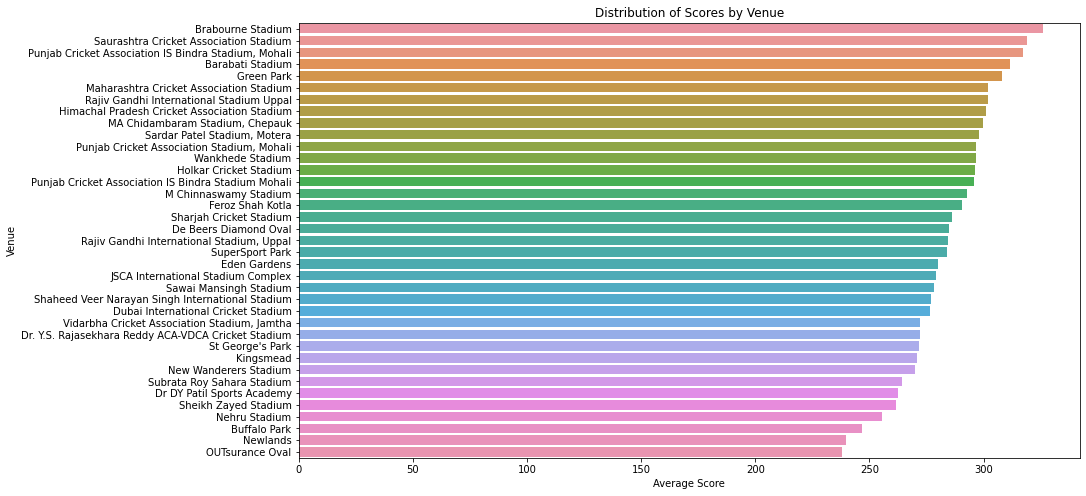

In [0]:
# Convert to Pandas DataFrame
scores_by_venue_pd = scores_by_venue.toPandas()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()